CoefficientFunctions
====

In NGSolve, `CoefficientFunctions` are representations of functions defined on the computational domain $\Omega$. Examples are expressions of coordinate variables $x, y, z$ and functions that are  constant on subdomains. Much of the magic behind the seamless integration of NGSolve with python lies in `CoefficientFunctions`. This tutorial introduces you to them.

In [1]:
import netgen.gui
%gui tk
from netgen.geom2d import unit_square
from ngsolve import *
mesh = Mesh (unit_square.GenerateMesh(maxh=0.2))

#### Define a function

In [2]:
myfunc = x*(1-x)
myfunc   # This is a CoefficientFunction

In [3]:
x        # This is a built-in CoefficientFunction

#### Draw the function

Use the `mesh` to visualize the function.

In [4]:
Draw(myfunc, mesh, "firstfun")

#### Evaluate the function

In [5]:
mip = mesh(0.2, 0.2)
myfunc(mip)

0.16000000000000003

Note that `myfunc(0.2,0.3)` does not work: You need to give points in the form of `MappedIntegrationPoint`s like `mip` above. The `mesh` knows how to produce them.

#### Examining functions on sets of points

In [6]:
pts = [(0.1*i, 0.2) for i in range(10)]
vals = [myfunc(mesh(*p)) for p in pts] 
for p,v in zip(pts, vals):
    print("point=(%3.2f,%3.2f), value=%6.5f"
         %(p[0], p[1], v))

point=(0.00,0.20), value=0.00000
point=(0.10,0.20), value=0.09000
point=(0.20,0.20), value=0.16000
point=(0.30,0.20), value=0.21000
point=(0.40,0.20), value=0.24000
point=(0.50,0.20), value=0.25000
point=(0.60,0.20), value=0.24000
point=(0.70,0.20), value=0.21000
point=(0.80,0.20), value=0.16000
point=(0.90,0.20), value=0.09000


We may plot the restriction of the `CoefficientFunction` on a line using matplotlib. 

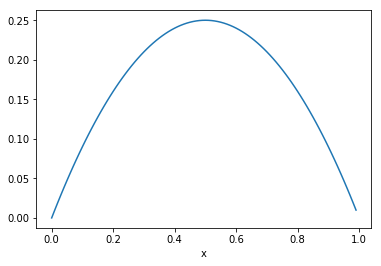

In [7]:
import matplotlib.pyplot as plt
px = [0.01*i for i in range(100)]
vals = [myfunc(mesh(p,0.5)) for p in px]
plt.plot(px,vals)
plt.xlabel('x')
plt.show()

#### Interpolate a `CoefficientFunction`

We may `Set` a `GridFunction` using a `CoefficientFunction`:

In [8]:
fes = H1(mesh, order=1)
u = GridFunction(fes)
u.Set(myfunc)
Draw(u)         # Cf.: Draw(myfunc, mesh, "firstfun")

* The `Set` method interpolates `myfunc` to obtain the grid function `u`.

* `Set` does an Oswald-type interpolation as follows:
    - It first zeros the grid function;
    - It then projects `myfunc` in $L^2$ on each mesh element;
    - It then averages dofs on element interfaces for conformity.

#### Integrate a `CoefficientFunction`

We can numerically integrate the function using the mesh:

In [9]:
Integrate(myfunc, mesh)

0.16666666666666602

#### Differentiate

You cannot directly differentiate a CoefficientFunction. But you can interpolate it into a `GridFunction` and then differentiate the `GridFunction`.

In [10]:
u.Set(myfunc)
gradu = grad(u)
gradu[0]

In [11]:
Draw(gradu[0], mesh, 'dx_firstfun')

Obviously the accuracy of this process can be improved for smooth functions by using higher order finite element spaces.

#### Vector-valued `CoefficientFunctions`

Above `gradu` provided an example of a vector-values coefficient function. To visualize it, click on `Visual` menu in GUI and check `Draw Surface Vectors`.

In [12]:
Draw(gradu, mesh, "grad_firstfun")

In [13]:
vecfun = CoefficientFunction((-y, sin(x)))

In [14]:
Draw(vecfun, mesh, "vecfun")

#### Expression tree

Internally, coefficient functions are implemented as an expression tree made from building blocks like `x`, `y`, `sin`, etc., and arithmetic operations.

E.g., the expression tree for `myfunc = x*(1-x)` looks like this:

In [15]:
print(myfunc) 

coef binary operation '*', real
  coef coordinate x, real
  coef binary operation '-', real
    coef N5ngfem27ConstantCoefficientFunctionE, real
    coef coordinate x, real

